<a href="https://colab.research.google.com/github/batu-el/l65_be301_dc755/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
!pip install dgl torch_geometric torch

# Install required python libraries
import os

# Install PyTorch Geometric and other libraries
if 'IS_GRADESCOPE_ENV' not in os.environ:
    print("Installing PyTorch Geometric")
    !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
    !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
    !pip install -q torch-geometric
    print("Installing other libraries")
    !pip install networkx
    !pip install lovely-tensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import sys
import time
import math
import random
import itertools
from datetime import datetime
from typing import Mapping, Tuple, Sequence, List

import pandas as pd
import networkx as nx
import numpy as np
import scipy as sp

from tqdm.notebook import tqdm

import torch
import torch.nn.functional as F
from torch.nn import Embedding, Linear, ReLU, BatchNorm1d, LayerNorm, Module, ModuleList, Sequential
from torch.nn import TransformerEncoder, TransformerEncoderLayer, MultiheadAttention
from torch.optim import Adam

import torch_geometric
from torch_geometric.data import Data, Batch
from torch_geometric.loader import DataLoader
from torch_geometric.datasets import Planetoid

import torch_geometric.transforms as T
from torch_geometric.utils import remove_self_loops, dense_to_sparse, to_dense_batch, to_dense_adj

from torch_geometric.nn import GCNConv, GATConv, GATv2Conv

# from torch_scatter import scatter, scatter_mean, scatter_max, scatter_sum

import lovely_tensors as lt
lt.monkey_patch()

import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore", category=RuntimeWarning)
# warnings.filterwarnings("ignore", category=UserWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)

print("All imports succeeded.")
print("Python version {}".format(sys.version))
print("PyTorch version {}".format(torch.__version__))
print("PyG version {}".format(torch_geometric.__version__))

/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:72: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:110: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


All imports succeeded.
Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
PyTorch version 2.2.1+cu121
PyG version 2.5.1


In [ ]:
# Set random seed for deterministic results

def seed(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed(0)
print("All seeds set.")

All seeds set.


# Datasets

In [ ]:
from torch_geometric.datasets import WebKB, WikipediaNetwork

DATASETS = {}

# Chamelion & Squirrel
# Cora & Citeseer
# Cornell & Texas & Wisconsin

## Mid Size Datasets
# Citation Networks
dataset = 'Cora'
dataset = Planetoid('/tmp/Cora', dataset)
data = dataset[0]
DATASETS['Cora'] = data
dataset = 'Citeseer'
dataset = Planetoid('/tmp/Citeseer', dataset)
data = dataset[0]
DATASETS['Citeseer'] = data
# Wikipedia Pages
dataset = 'Chameleon'
dataset = WikipediaNetwork(root='/tmp/Chameleon', name='Chameleon')
data = dataset[0]
DATASETS['Chameleon'] = data
dataset = 'Squirrel'
dataset = WikipediaNetwork(root='/tmp/Squirrel', name='Squirrel')
data = dataset[0]
DATASETS['Squirrel'] = data
### Small Sized Datasets
# Web Pages
dataset = WebKB(root='/tmp/Cornell', name='Cornell')
data = dataset[0]
DATASETS['Cornell'] = data
dataset = WebKB(root='/tmp/Texas', name='Texas')
data = dataset[0]
DATASETS['Texas'] = data
dataset = WebKB(root='/tmp/Wisconsin', name='Wisconsin')
data = dataset[0]
DATASETS['Wisconsin'] = data

In [ ]:
# import tqdm
# ### Shortest Paths ###
# def get_shortest_path_matrix(adjacency_matrix):
#     graph = nx.from_numpy_array(adjacency_matrix.cpu().numpy(), create_using=nx.DiGraph)
#     shortest_path_matrix = nx.floyd_warshall_numpy(graph)
#     shortest_path_matrix = torch.tensor(shortest_path_matrix).float()
#     return shortest_path_matrix

# SHORTEST_PATHS = {}
# for data_key in tqdm.tqdm(DATASETS):
#   print(data_key)
#   data = DATASETS[data_key]
#   dense_adj = to_dense_adj(data.edge_index, max_num_nodes = data.x.shape[0])[0]
#   dense_shortest_path_matrix = get_shortest_path_matrix(dense_adj)
#   SHORTEST_PATHS[data_key] = dense_shortest_path_matrix

# ### Save the Shortest Paths
# import pickle
# with open('sp_dict.pkl', 'wb') as f:
#     pickle.dump(SHORTEST_PATHS, f)
import pickle
with open('drive/MyDrive/Colab Notebooks/L65_Project/shortest_paths/sp_dict.pkl', 'rb') as f:
    SHORTEST_PATHS = pickle.load(f)

In [ ]:
for data_key in DATASETS:
  data = DATASETS[data_key]
  data.dense_sp_matrix = SHORTEST_PATHS[data_key]
  data.dense_adj = to_dense_adj(data.edge_index, max_num_nodes = data.x.shape[0])[0]
  data.dense_adj = data.dense_adj.cuda() + torch.eye(data.dense_adj.shape[0]).cuda()
  data = T.AddLaplacianEigenvectorPE(k = 16, attr_name = 'pos_enc')(data)
  DATASETS[data_key] = data

In [ ]:
### Masks ###

def generate_masks(num_nodes=None,num_runs=None,train_ratio=None, val_ratio=None):
    masks = { 'train_mask': np.zeros((num_nodes, num_runs), dtype=int),
              'val_mask': np.zeros((num_nodes, num_runs), dtype=int),
              'test_mask': np.zeros((num_nodes, num_runs), dtype=int)}

    for run in range(num_runs):
        indices = np.arange(num_nodes)
        np.random.shuffle(indices)
        train_end = int(train_ratio * num_nodes)
        val_end = train_end + int(val_ratio * num_nodes)
        masks['train_mask'][indices[:train_end], run] = 1
        masks['val_mask'][indices[train_end:val_end], run] = 1
        masks['test_mask'][indices[val_end:], run] = 1

    tensor_masks = {'train_mask': torch.tensor(masks['train_mask']),
                    'val_mask':torch.tensor(masks['val_mask']),
                    'test_mask':torch.tensor(masks['test_mask'])}
    return tensor_masks

for data_key in DATASETS:
    data = DATASETS[data_key]

    masks = generate_masks(num_nodes=data.x.shape[0], num_runs=10, train_ratio=0.4, val_ratio=0.3)
    data.train_mask = masks['train_mask'].bool()
    data.val_mask = masks['val_mask'].bool()
    data.test_mask = masks['test_mask'].bool()

    if len(data.train_mask.shape)==1:
      print('Add 10 Masks')
    else:
      print('We have 10 Masks')
      print('Train Ratio:',(data.train_mask[:,0].sum() / len(data.train_mask[:,0])).item())
      print('Val Ratio:',(data.val_mask[:,0].sum() / len(data.val_mask[:,0])).item())
      print('Test Ratio:',(data.test_mask[:,0].sum() / len(data.test_mask[:,0])).item())

We have 10 Masks
Train Ratio: 0.39992615580558777
Val Ratio: 0.29985228180885315
Test Ratio: 0.3002215623855591
We have 10 Masks
Train Ratio: 0.39975953102111816
Val Ratio: 0.29996994137763977
Test Ratio: 0.30027052760124207
We have 10 Masks
Train Ratio: 0.39964866638183594
Val Ratio: 0.2999560832977295
Test Ratio: 0.30039525032043457
We have 10 Masks
Train Ratio: 0.39992308616638184
Val Ratio: 0.2999423146247864
Test Ratio: 0.3001345992088318
We have 10 Masks
Train Ratio: 0.3989070951938629
Val Ratio: 0.2950819730758667
Test Ratio: 0.3060109317302704
We have 10 Masks
Train Ratio: 0.3989070951938629
Val Ratio: 0.2950819730758667
Test Ratio: 0.3060109317302704
We have 10 Masks
Train Ratio: 0.39840638637542725
Val Ratio: 0.29880478978157043
Test Ratio: 0.3027888536453247


## Table 1: Dataset Statistics

In [ ]:
### Table 1 ###
### Dataset Statistics ###
import dgl
Homophily_Levels = {}

for data_key in DATASETS:
  data = DATASETS[data_key]
  edge_index_tensor = torch.tensor(data.edge_index.cpu().numpy(), dtype=torch.long)
  g = dgl.graph((edge_index_tensor[0], edge_index_tensor[1]), num_nodes=data.x.shape[0])
  g.ndata['y'] = torch.tensor(data.y.cpu().numpy(), dtype=torch.long)
  Homophily_Levels[data_key] = {'Node Homophily':dgl.node_homophily(g, g.ndata['y'])*100,
                                'Edge Homophily':dgl.edge_homophily(g, g.ndata['y'])*100,
                                'Adjusted Homophily':dgl.adjusted_homophily(g, g.ndata['y'])*100,
                                'Number of Nodes': int(g.num_nodes()),
                                'Number of Edges': int(g.num_edges())
                                }
df = pd.DataFrame(Homophily_Levels).round(1)
df

Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


DGL backend not selected or invalid.  Assuming PyTorch for now.


,Cora,Citeseer,Chameleon,Squirrel,Cornell,Texas,Wisconsin
Node Homophily,82.5,70.6,10.4,8.9,10.6,6.5,17.2
Edge Homophily,81.0,73.6,23.5,22.4,13.1,10.8,19.6
Adjusted Homophily,77.1,67.1,3.3,0.7,-21.1,-25.9,-15.2
Number of Nodes,2708.0,3327.0,2277.0,5201.0,183.0,183.0,251.0
Number of Edges,10556.0,9104.0,36101.0,217073.0,298.0,325.0,515.0


# Cache Data

In [ ]:
import pickle

NUM_LAYERS = 1
NUM_HEADS = 1
with open('drive/MyDrive/Colab Notebooks/L65_Project/' + f'all_stats_{NUM_LAYERS}L_{NUM_HEADS}H.pkl', 'rb') as f:
  all_stats_1L_1H = pickle.load(f)

In [ ]:
NUM_LAYERS = 1
NUM_HEADS = 2
with open('drive/MyDrive/Colab Notebooks/L65_Project/' + f'all_stats_{NUM_LAYERS}L_{NUM_HEADS}H.pkl', 'rb') as f:
  all_stats_1L_2H = pickle.load(f)

In [ ]:
NUM_LAYERS = 2
NUM_HEADS = 1
with open('drive/MyDrive/Colab Notebooks/L65_Project/' + f'all_stats_{NUM_LAYERS}L_{NUM_HEADS}H.pkl', 'rb') as f:
  all_stats_2L_1H = pickle.load(f)

In [ ]:
NUM_LAYERS = 2
NUM_HEADS = 2
with open('drive/MyDrive/Colab Notebooks/L65_Project/' + f'all_stats_{NUM_LAYERS}L_{NUM_HEADS}H.pkl', 'rb') as f:
  all_stats_2L_2H = pickle.load(f)

In [ ]:
def get_attns(all_stats):
    all_attns = {}

    for data_key in all_stats:
        st_avg_attentions = []
        dt_avg_attentions = []
        dt2_avg_attentions = []
        run_stats = all_stats[data_key]
        for run_idx in run_stats:
            attentions = run_stats[run_idx]['attentions']
            st_avg_attentions.append(attentions['SparseGraphTransformerModel'])
            dt_avg_attentions.append(attentions['DenseGraphTransformerModel'])
            dt2_avg_attentions.append(attentions['DenseGraphTransformerModel_V2'])
        st_attentions = torch.stack(st_avg_attentions)
        dt_attentions = torch.stack(dt_avg_attentions)
        dt2_attentions = torch.stack(dt2_avg_attentions)
        all_attns[data_key] = {'st_avg': st_attentions.mean(axis=0),
                              'dt_avg': dt_attentions.mean(axis=0),
                              'dt2_avg': dt2_attentions.mean(axis=0)
                              }
    return all_attns

all_attns_1L_1H = get_attns(all_stats_1L_1H)
all_attns_1L_2H = get_attns(all_stats_1L_2H)
all_attns_2L_1H = get_attns(all_stats_2L_1H)
all_attns_2L_2H = get_attns(all_stats_2L_2H)

In [ ]:
model_keys = ['st_avg', 'dt_avg', 'dt2_avg']
data_keys = list(DATASETS.keys())
A1L_1H = {data_key: {model_key: all_attns_1L_1H[data_key][model_key].mean(axis=1)[0] for model_key in model_keys} for data_key in data_keys}
A1L_2H = {data_key: {model_key: all_attns_1L_2H[data_key][model_key].mean(axis=1)[0]  for model_key in model_keys} for data_key in data_keys}
A2L_1H = {data_key: {model_key: (all_attns_2L_1H[data_key][model_key].mean(axis=1)[0] @ all_attns_2L_1H[data_key][model_key].mean(axis=1)[1]).cpu() for model_key in model_keys} for data_key in data_keys}
A2L_2H = {data_key: {model_key: (all_attns_2L_2H[data_key][model_key].mean(axis=1)[0] @ all_attns_2L_2H[data_key][model_key].mean(axis=1)[1]).cpu() for model_key in model_keys} for data_key in data_keys}

# Analysis


## Question 1: How does the Model Accuracy vary Across Datasets

### Table 2: Accuracy Statistics

In [ ]:
### Table 2 ###
### Accuracy Statistics ###
pd.set_option('display.max_columns', None)

model_specs =  {'1L1H':all_stats_1L_1H, '1L2H':all_stats_1L_2H, '2L1H':all_stats_2L_1H, '2L2H':all_stats_2L_2H }

df_spec = {}
for spec in model_specs:
  all_stats_df = {}
  all_stats = model_specs[spec]
  for data_key in all_stats:
    run_stats = all_stats[data_key]
    table1 = pd.concat({key : pd.DataFrame(run_stats[key]['accuracy']) for key in run_stats}, axis=0)
    table1_train = pd.concat({'mean': table1.mean(level=1, axis=0).loc['train_acc'], 'std':table1.std(level=1).loc['train_acc']}, axis=1)
    table1_test = pd.concat({'mean': table1.mean(level=1, axis=0).loc['test_acc'], 'std':table1.std(level=1).loc['test_acc']}, axis=1)
    # table1 = pd.concat({'Train': table1_train, 'Test': table1_test}, axis=1)
    table1 = table1_test
    all_stats_df[data_key] = table1
  df_spec[spec] = pd.concat(all_stats_df, axis=1).round(2)

<ipython-input-84-88171a007095>:14: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  table1_train = pd.concat({'mean': table1.mean(level=1, axis=0).loc['train_acc'], 'std':table1.std(level=1).loc['train_acc']}, axis=1)
<ipython-input-84-88171a007095>:14: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.var(level=1) should use df.groupby(level=1).var().
  table1_train = pd.concat({'mean': table1.mean(level=1, axis=0).loc['train_acc'], 'std':table1.std(level=1).loc['train_acc']}, axis=1)
<ipython-input-84-88171a007095>:15: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).

In [ ]:
pd.concat(df_spec)

Cora       Citeseer       Chameleon        \
                                    mean   std     mean   std      mean   std   
1L1H GCN                            0.84  0.01     0.75  0.01      0.46  0.02   
     SparseGraphTransformerModel    0.85  0.01     0.74  0.01      0.58  0.02   
     DenseGraphTransformerModel     0.84  0.01     0.74  0.02      0.58  0.02   
     DenseGraphTransformerModel_V2  0.69  0.02     0.69  0.01      0.50  0.02   
1L2H GCN                            0.85  0.01     0.75  0.01      0.46  0.02   
     SparseGraphTransformerModel    0.85  0.01     0.74  0.01      0.59  0.02   
     DenseGraphTransformerModel     0.85  0.01     0.74  0.01      0.59  0.02   
     DenseGraphTransformerModel_V2  0.69  0.02     0.69  0.01      0.51  0.02   
2L1H GCN                            0.86  0.01     0.75  0.01      0.43  0.03   
     SparseGraphTransformerModel    0.87  0.01     0.74  0.01      0.60  0.02   
     DenseGraphTransformerModel     0.87  0.01     0.75  0.01      0.61  0.01   
     DenseGraphTransformerModel_V2  0.69  0.02     0.69  0.01      0.50  0.02   
2L2H GCN                            0.86  0.01     0.75  0.01      0.44  0.03   
     SparseGraphTransformerModel    0.87  0.01     0.74  0.01      0.61  0.02   
     DenseGraphTransformerModel     0.86  0.01     0.74  0.01      0.63  0.02   
     DenseGraphTransformerModel_V2  0.69  0.02     0.69  0.01      0.50  0.02   

                                   Squirrel       Cornell       Texas        \
                                       mean   std    mean   std  mean   std   
1L1H GCN                               0.32  0.01    0.62  0.07  0.69  0.06   
     SparseGraphTransformerModel       0.40  0.01    0.66  0.07  0.78  0.08   
     DenseGraphTransformerModel        0.41  0.01    0.67  0.05  0.78  0.07   
     DenseGraphTransformerModel_V2     0.36  0.01    0.71  0.06  0.78  0.04   
1L2H GCN                               0.32  0.02    0.63  0.05  0.67  0.09   
     SparseGraphTransformerModel       0.42  0.01    0.66  0.08  0.77  0.08   
     DenseGraphTransformerModel        0.41  0.01    0.65  0.09  0.74  0.08   
     DenseGraphTransformerModel_V2     0.36  0.00    0.71  0.06  0.78  0.08   
2L1H GCN                               0.32  0.02    0.60  0.06  0.66  0.07   
     SparseGraphTransformerModel       0.43  0.01    0.64  0.05  0.77  0.07   
     DenseGraphTransformerModel        0.43  0.02    0.63  0.09  0.73  0.08   
     DenseGraphTransformerModel_V2     0.36  0.01    0.72  0.06  0.79  0.07   
2L2H GCN                               0.31  0.02    0.59  0.05  0.64  0.08   
     SparseGraphTransformerModel       0.44  0.01    0.61  0.07  0.77  0.07   
     DenseGraphTransformerModel        0.44  0.01    0.62  0.09  0.75  0.07   
     DenseGraphTransformerModel_V2     0.36  0.01    0.70  0.06  0.77  0.08   

                                   Wisconsin        
                                        mean   std  
1L1H GCN                                0.76  0.04  
     SparseGraphTransformerModel        0.78  0.03  
     DenseGraphTransformerModel         0.78  0.03  
     DenseGraphTransformerModel_V2      0.80  0.03  
1L2H GCN                                0.76  0.04  
     SparseGraphTransformerModel        0.78  0.04  
     DenseGraphTransformerModel         0.79  0.03  
     DenseGraphTransformerModel_V2      0.79  0.04  
2L1H GCN                                0.71  0.03  
     SparseGraphTransformerModel        0.77  0.03  
     DenseGraphTransformerModel         0.76  0.05  
     DenseGraphTransformerModel_V2      0.80  0.03  
2L2H GCN                                0.72  0.04  
     SparseGraphTransformerModel        0.75  0.02  
     DenseGraphTransformerModel         0.78  0.04  
     DenseGraphTransformerModel_V2      0.81  0.03

## Question 2: Do the Nodes Attend to Neighbors?

### Figure 1: Attention to Neighbors

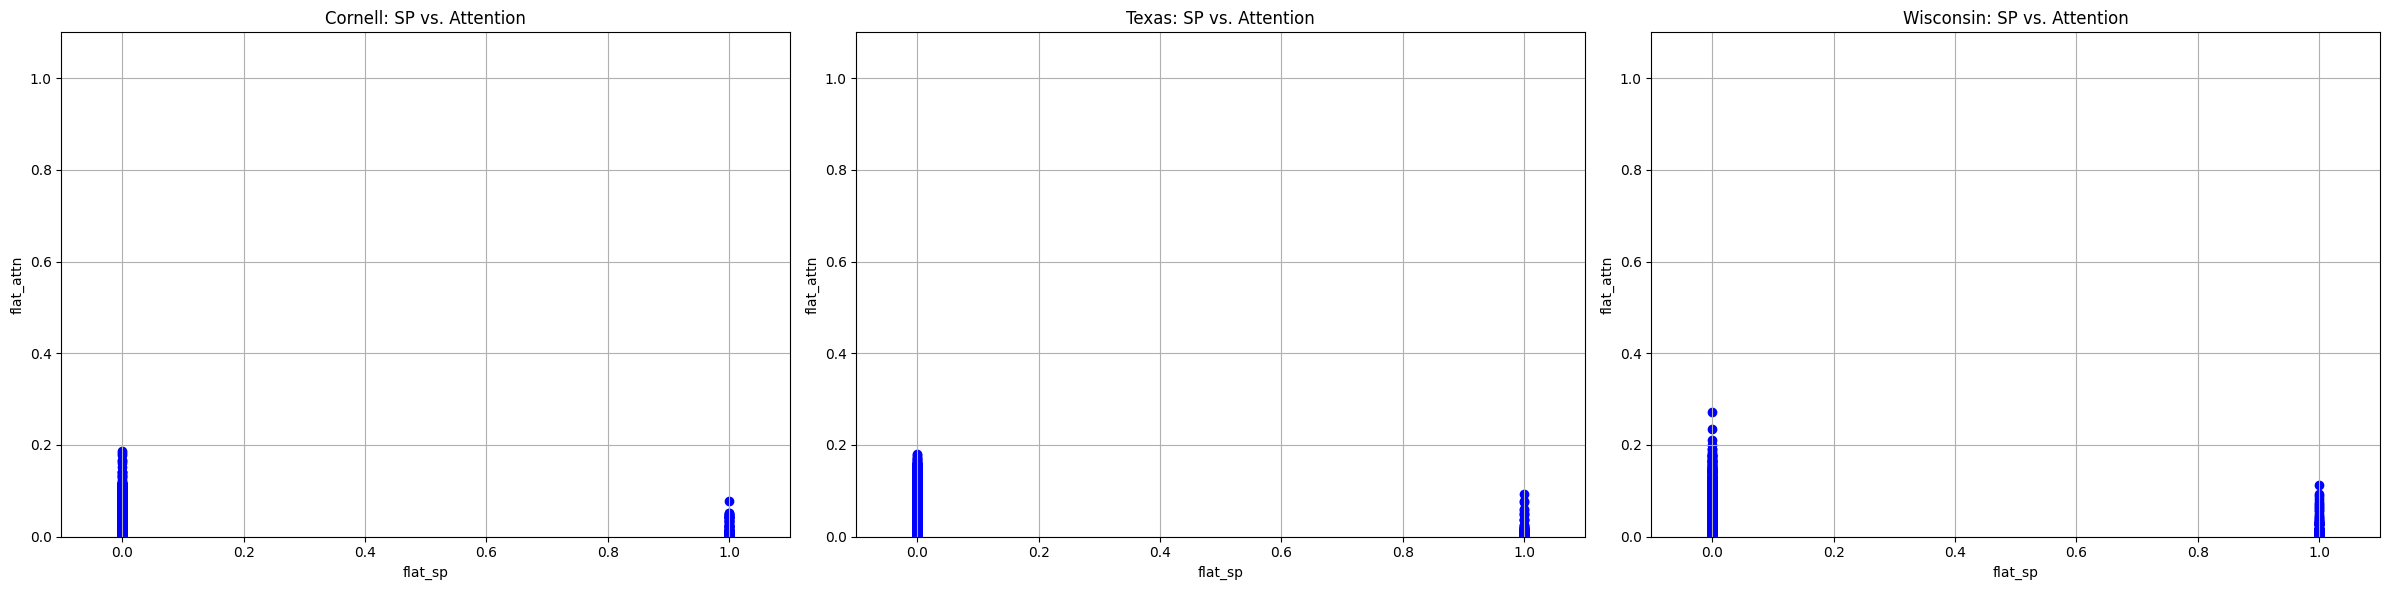

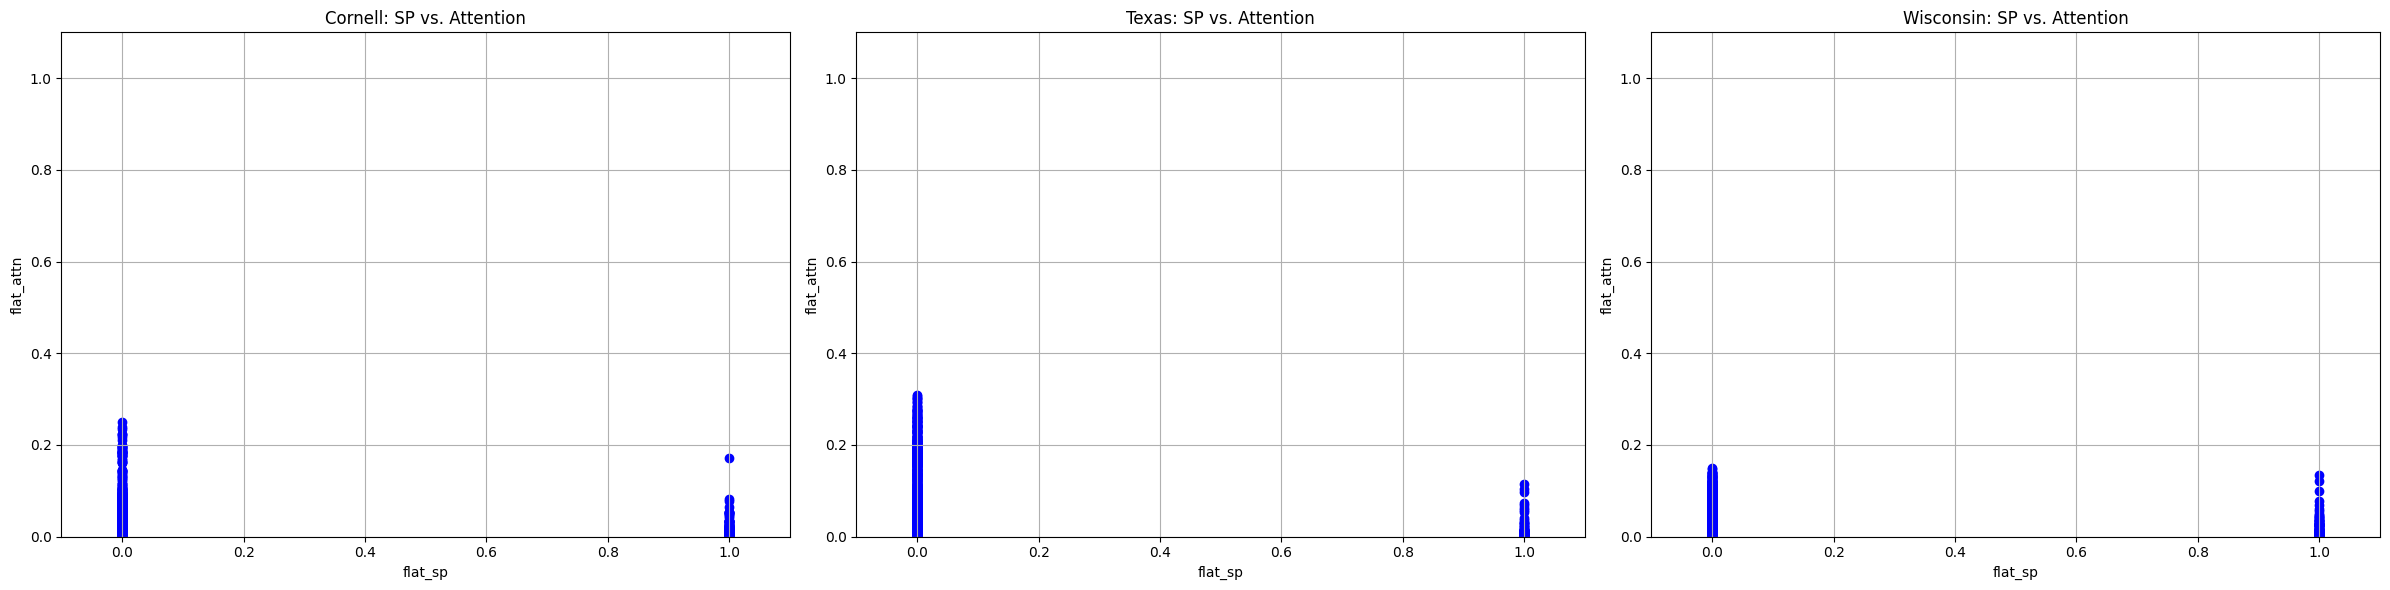

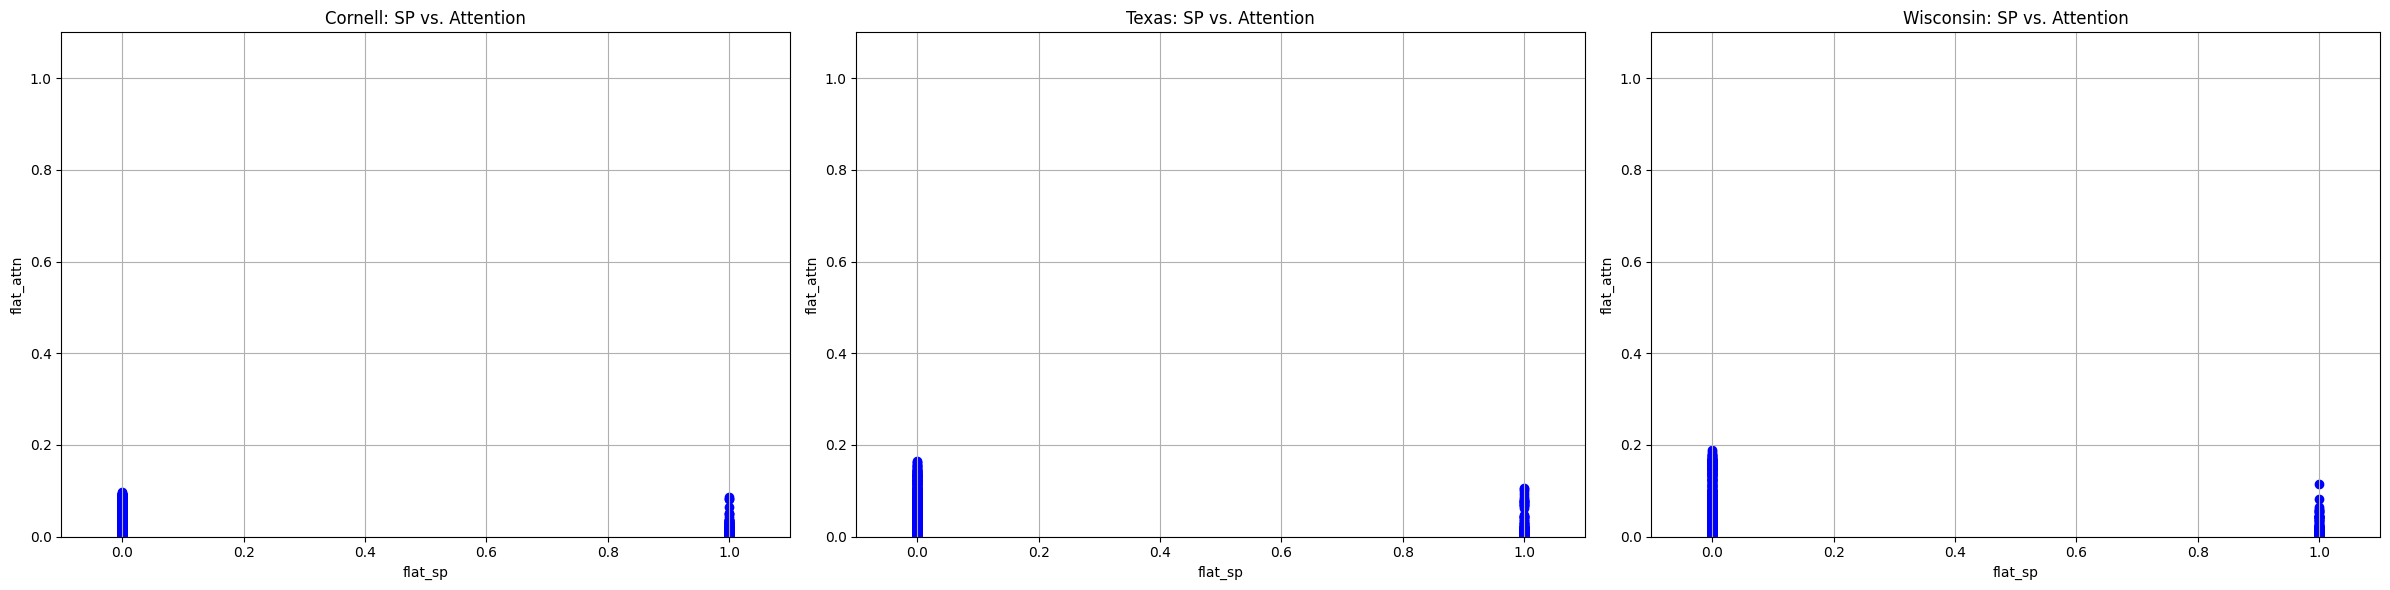

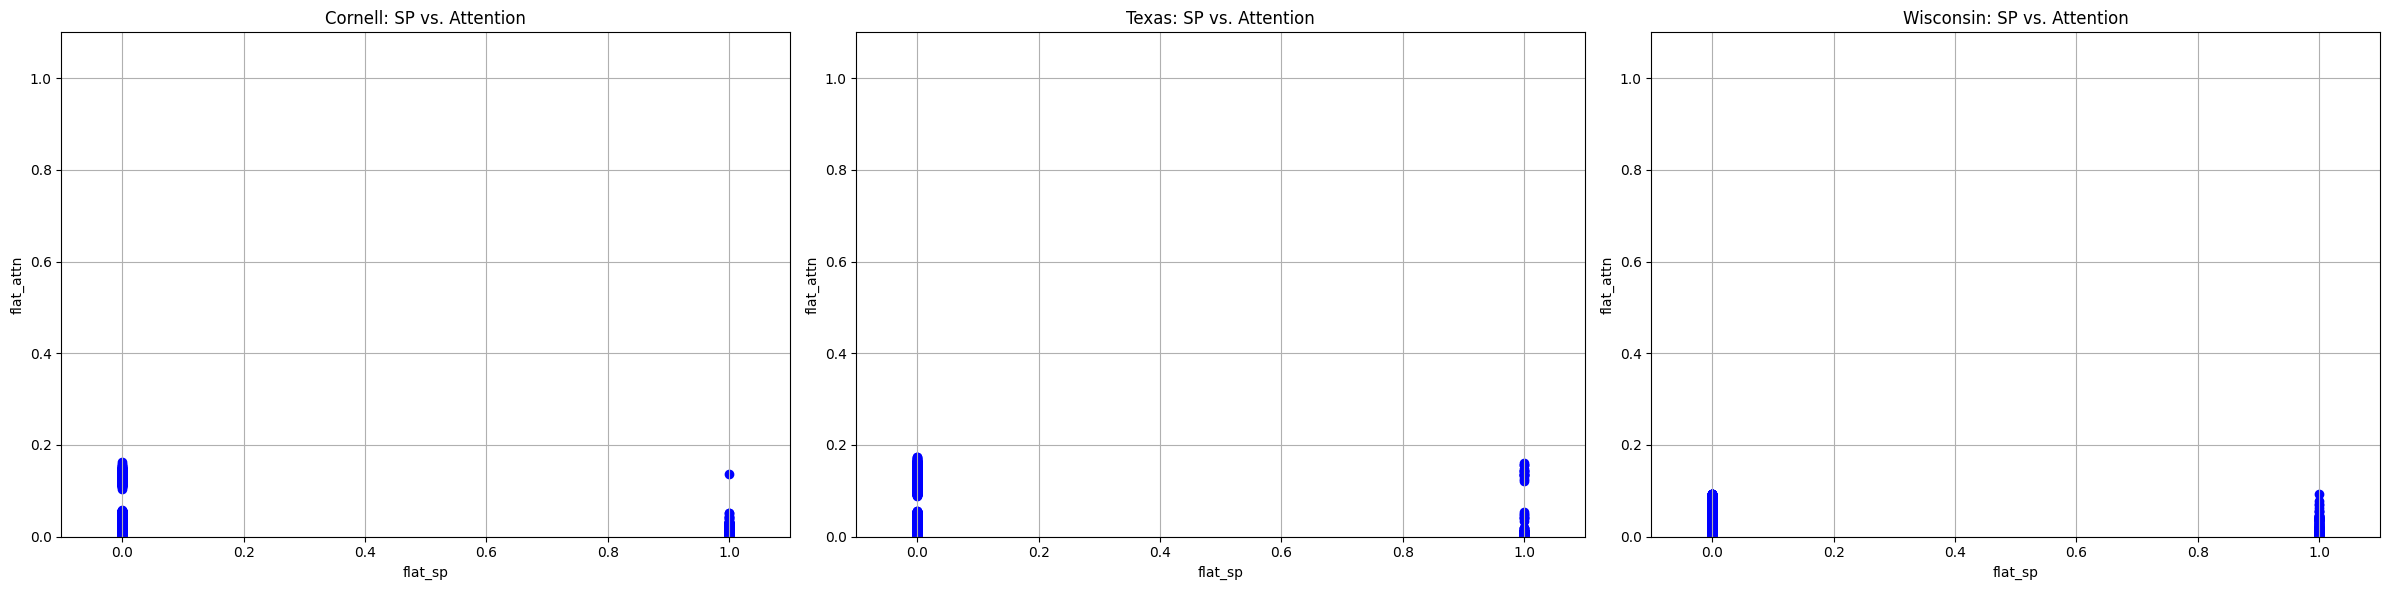

In [ ]:
### Figure 1 ###

import matplotlib.pyplot as plt
import numpy as np

# data_key = 'Cora'
metric = 'dt2_avg'

model_specs = [A1L_1H, A1L_2H, A2L_1H, A2L_2H ]

DATASETS1 = {key:DATASETS[key] for key in list(DATASETS.keys())[:4]}
DATASETS2 = {key:DATASETS[key] for key in list(DATASETS.keys())[4:]}

DATASET_CURR = DATASETS2
x_min, x_max = -0.1, 1.1
y_min, y_max = 0, 1.1

for all_attns in model_specs:
  fig, axes = plt.subplots(1, len(DATASET_CURR), figsize=(24, 6))
  for ax, (data_key, data_value) in zip(axes, DATASET_CURR.items()):
      attn = all_attns[data_key][metric]
      adj = data_value["dense_adj"]
      adj[adj==2] = 1
      ax.scatter(adj.cpu(), attn.cpu(), color='blue')
      ax.set_title(f'{data_key}: SP vs. Attention')
      ax.set_xlabel('flat_sp')
      ax.set_ylabel('flat_attn')
      ax.set_xlim(x_min, x_max)
      ax.set_ylim(y_min, y_max)
      ax.grid(True)

  plt.tight_layout()
  plt.show()

### Figure 2: Attention to N-hop Neighborhood

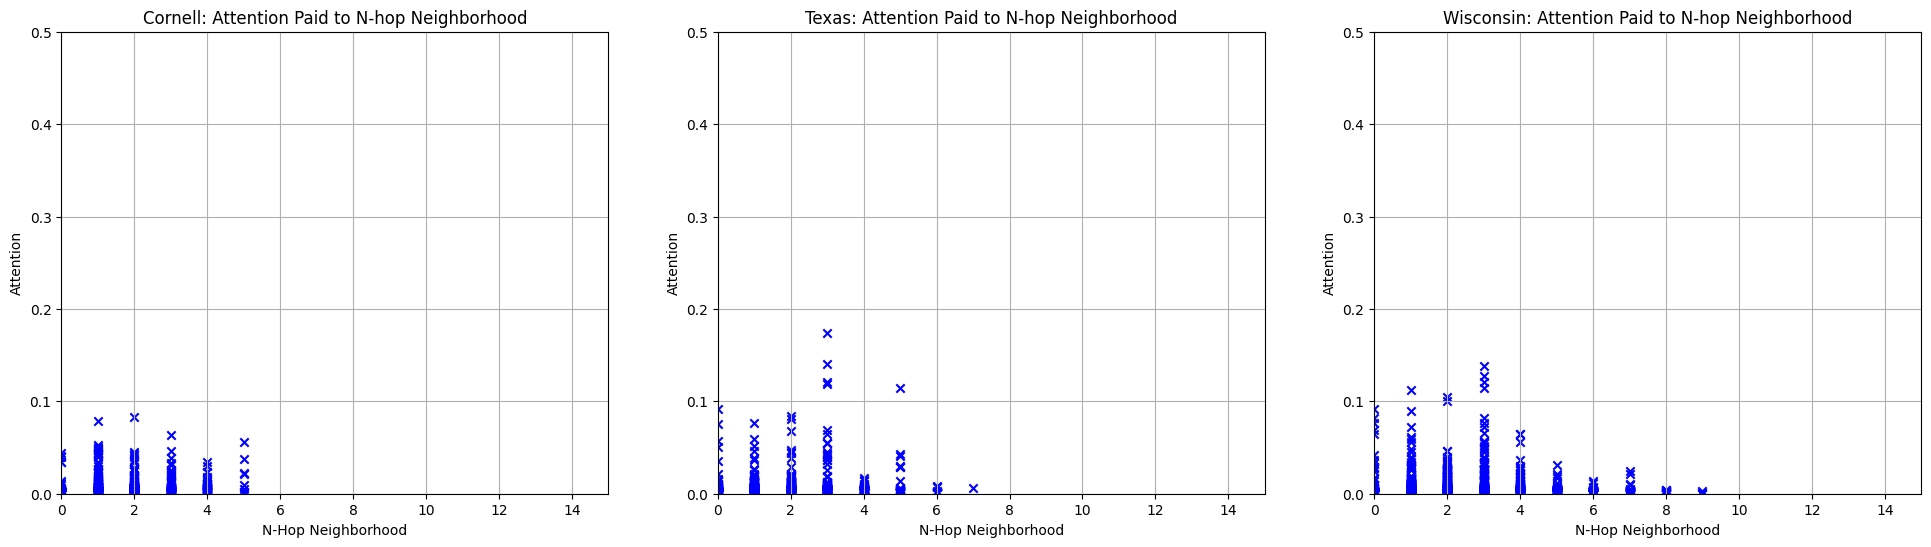

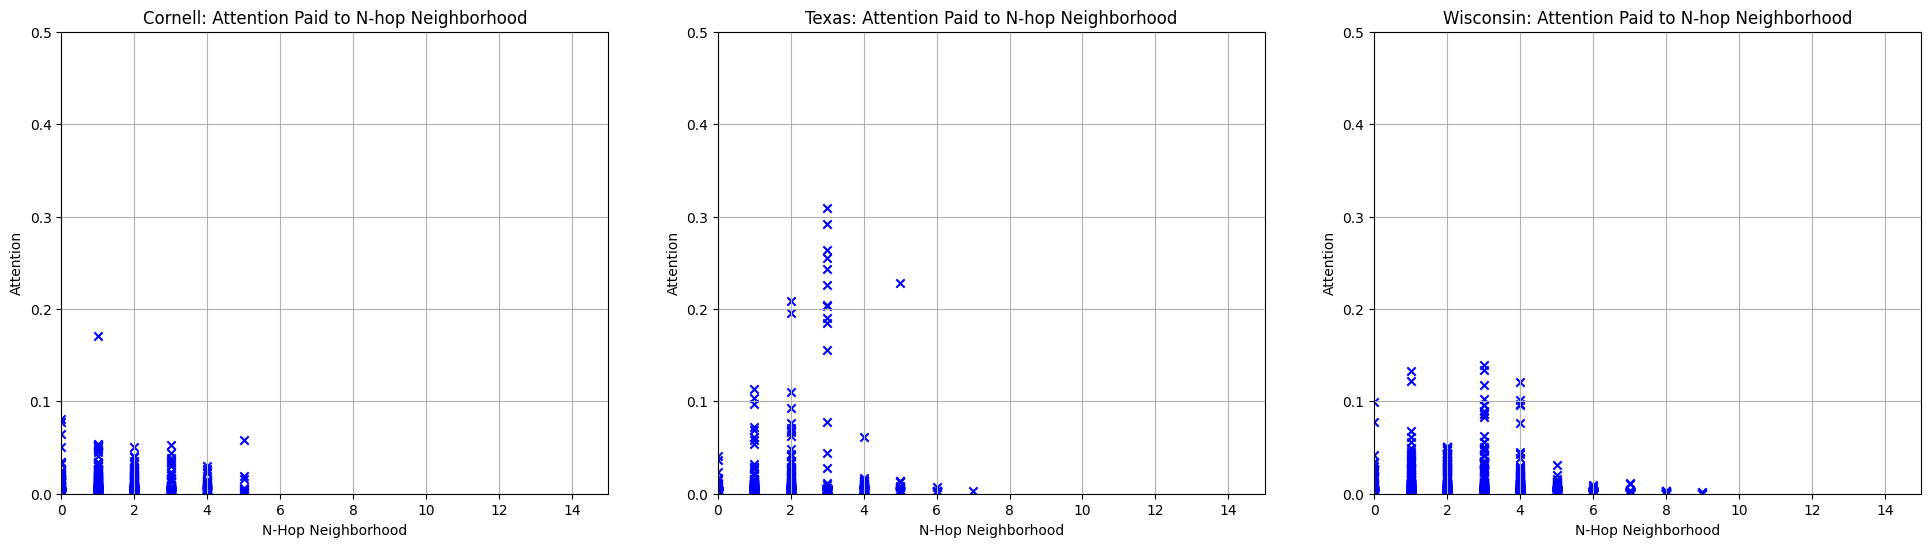

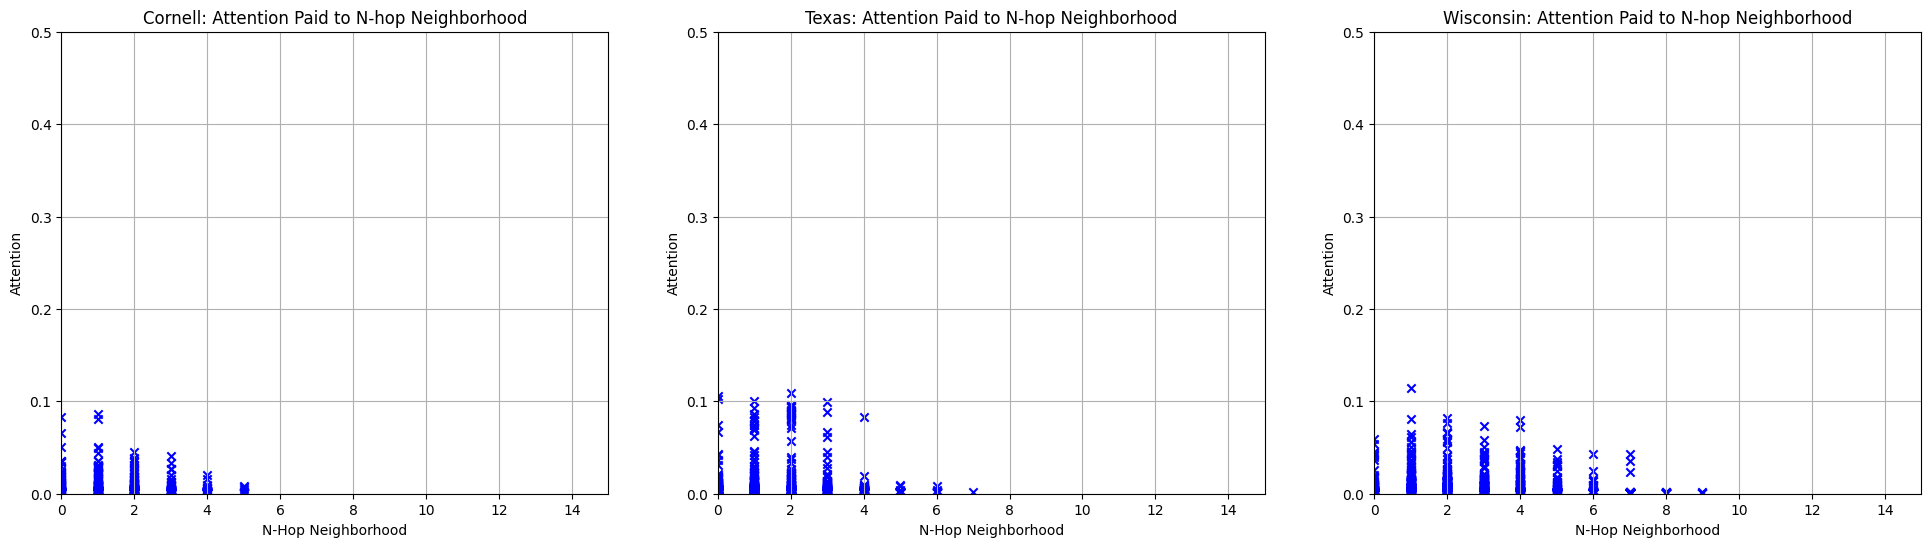

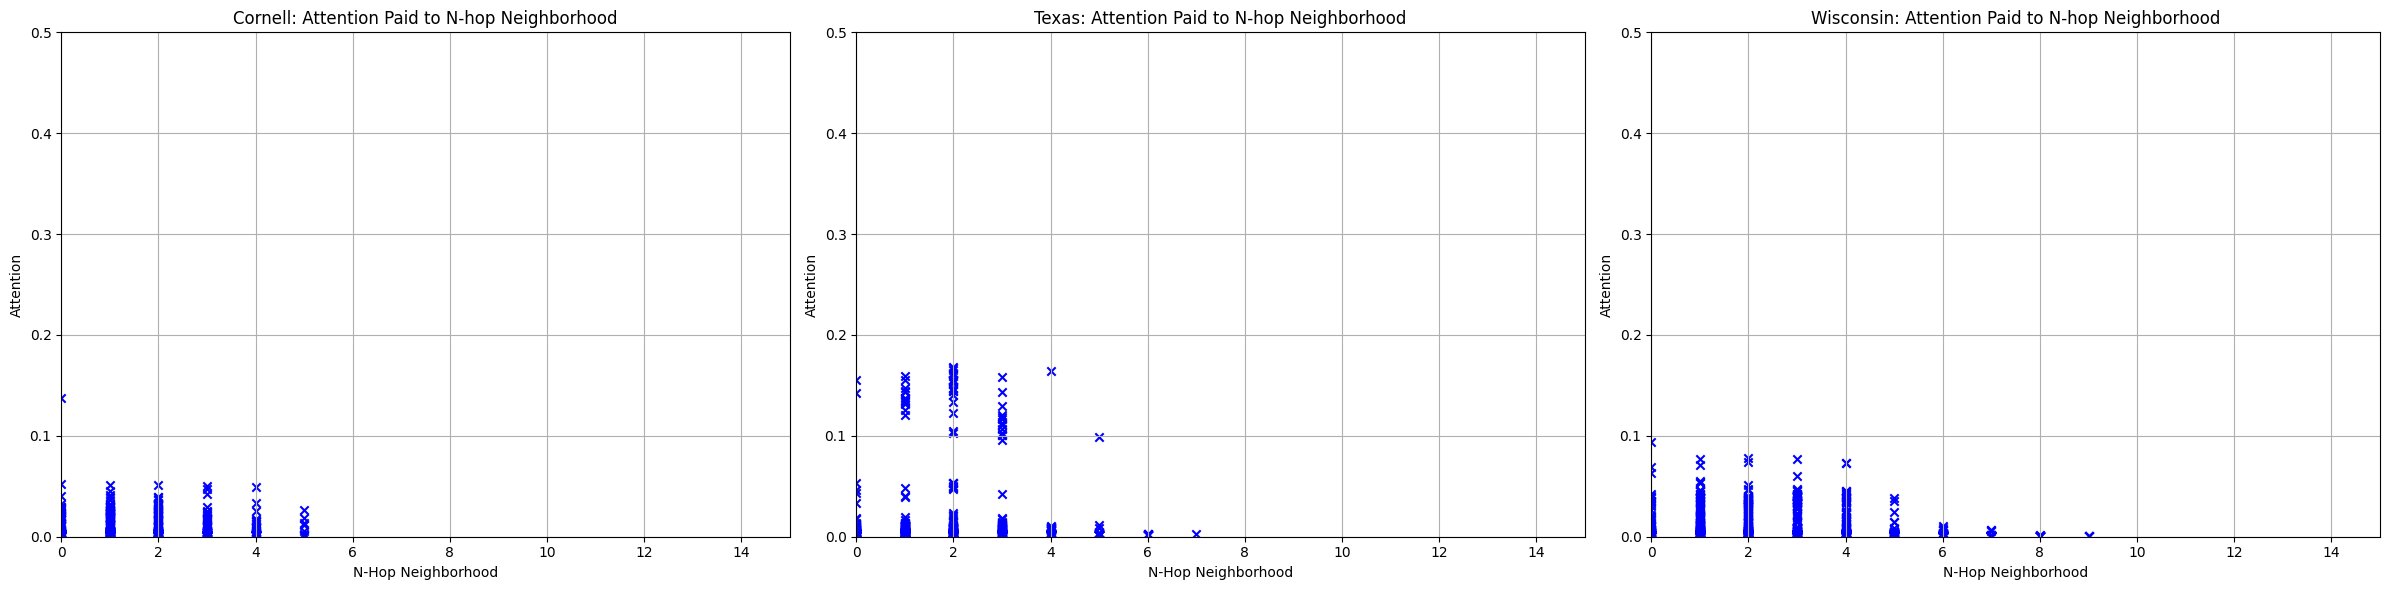

In [ ]:
### Figure 2 ###

import matplotlib.pyplot as plt
import numpy as np

# data_key = 'Cora'
metric = 'dt2_avg'

# Figure 2 subplots
DATASETS1 = {key:DATASETS[key] for key in list(DATASETS.keys())[:4]}
DATASETS2 = {key:DATASETS[key] for key in list(DATASETS.keys())[4:]}

model_specs = [A1L_1H, A1L_2H, A2L_1H, A2L_2H ]

DATASET_CURR = DATASETS2

x_min, x_max = 0, 15
y_min, y_max = 0, 0.5

for all_attns in model_specs:
  fig, axes = plt.subplots(1, len(DATASET_CURR), figsize=(24, 6))
  for ax, (data_key, data_value) in zip(axes, DATASET_CURR.items()):
      attn = all_attns[data_key][metric]
      sp = data_value["dense_sp_matrix"]
      ax.scatter(sp.cpu(), attn.cpu(), marker='x', color='blue')#,c=attn.cpu(), cmap='icefire')
      ax.set_title(f'{data_key}: Attention Paid to N-hop Neighborhood')
      ax.set_xlabel('N-Hop Neighborhood')
      ax.set_ylabel('Attention')
      ax.set_xlim(x_min, x_max)
      ax.set_ylim(y_min, y_max)
      ax.grid(True)

plt.tight_layout()
plt.show()

### Figure 3: Attention Expected N-Hop

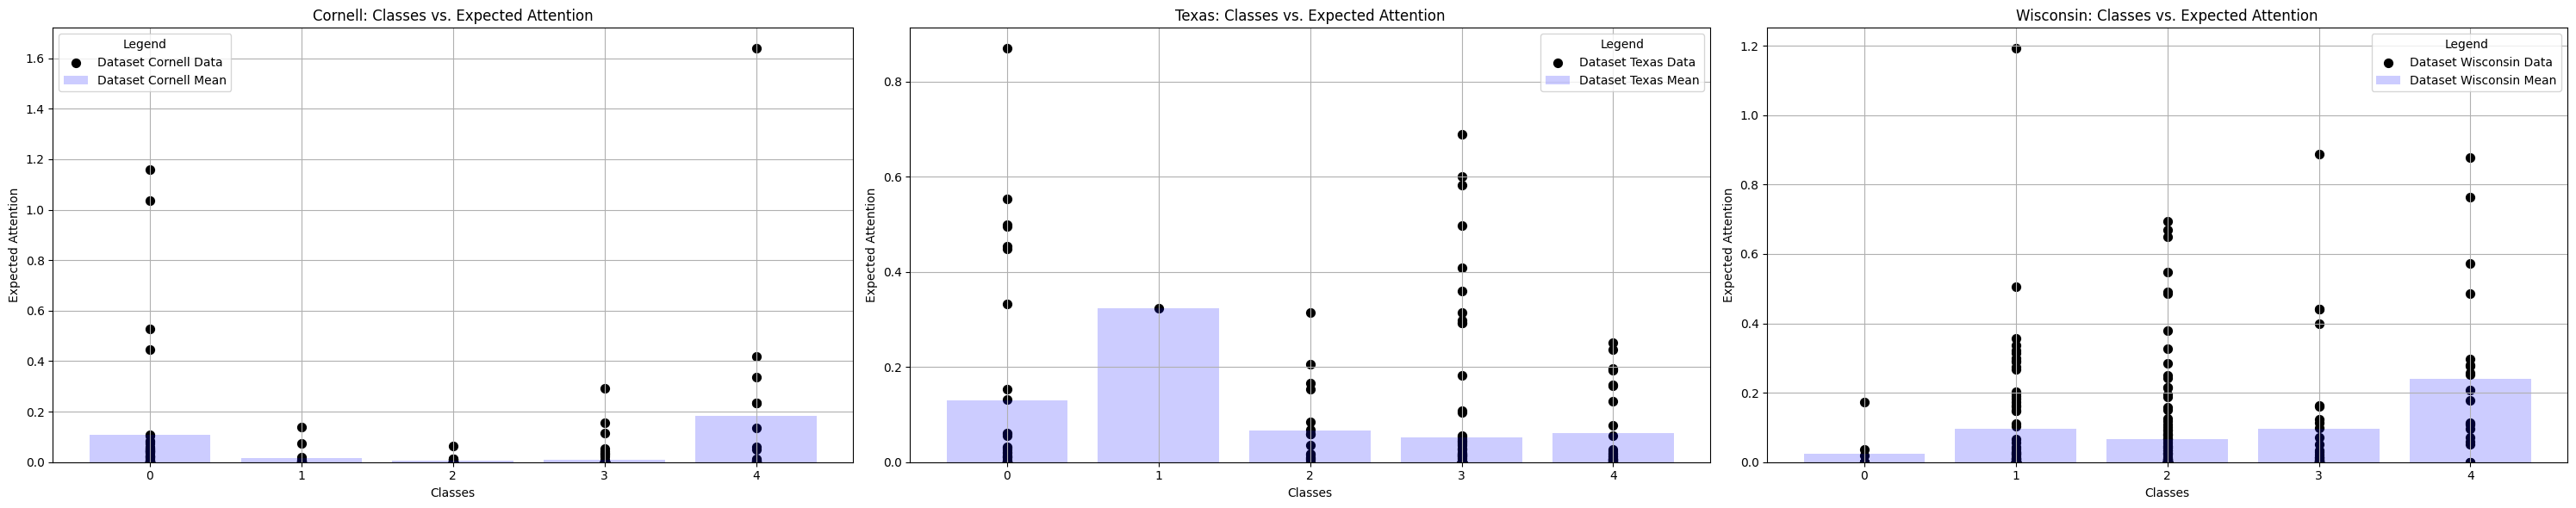

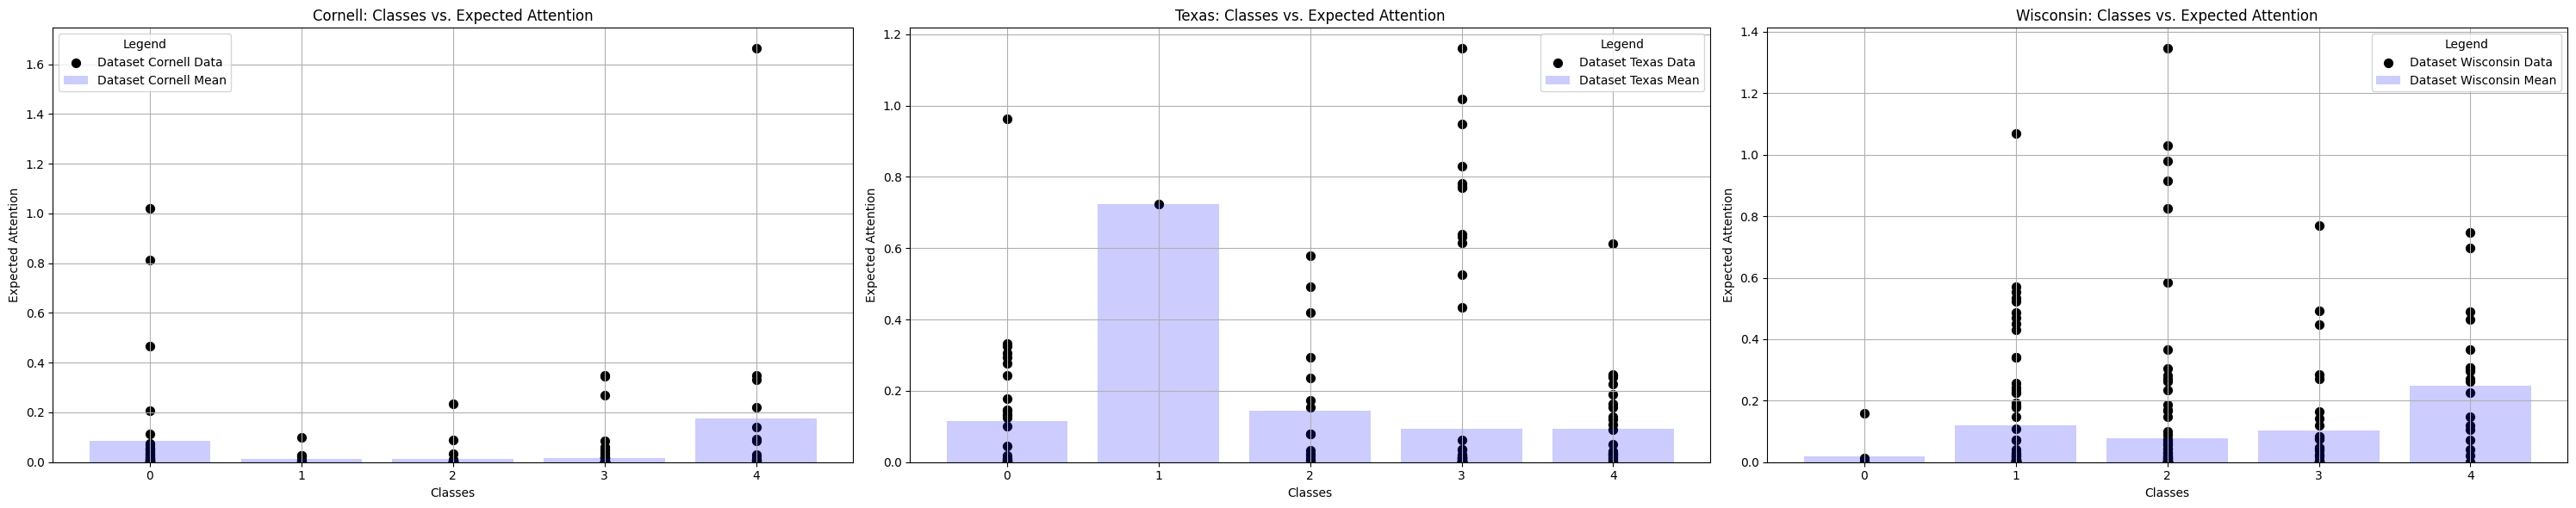

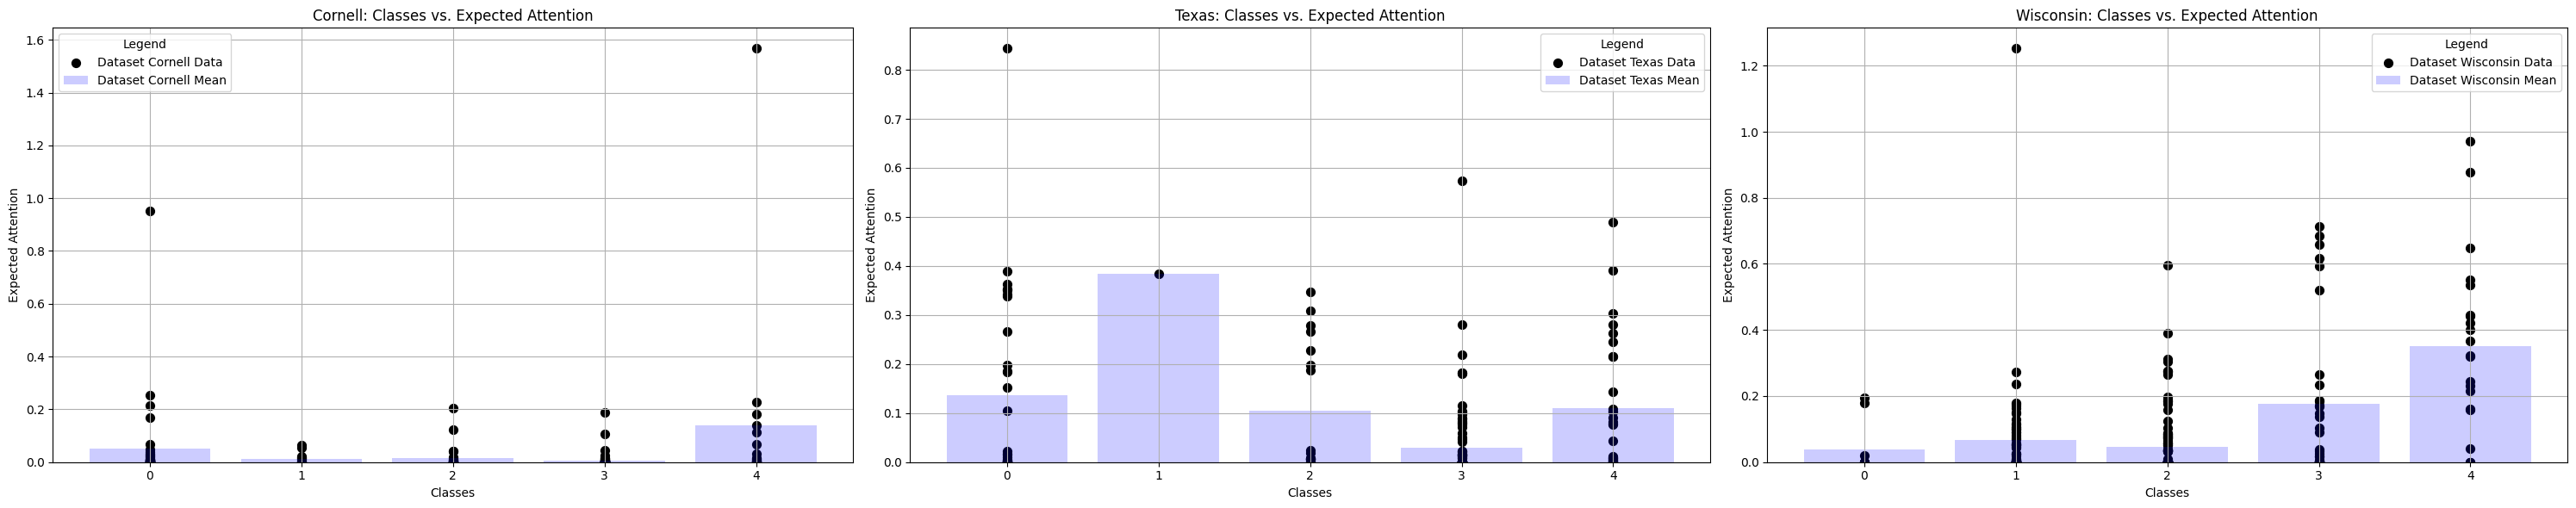

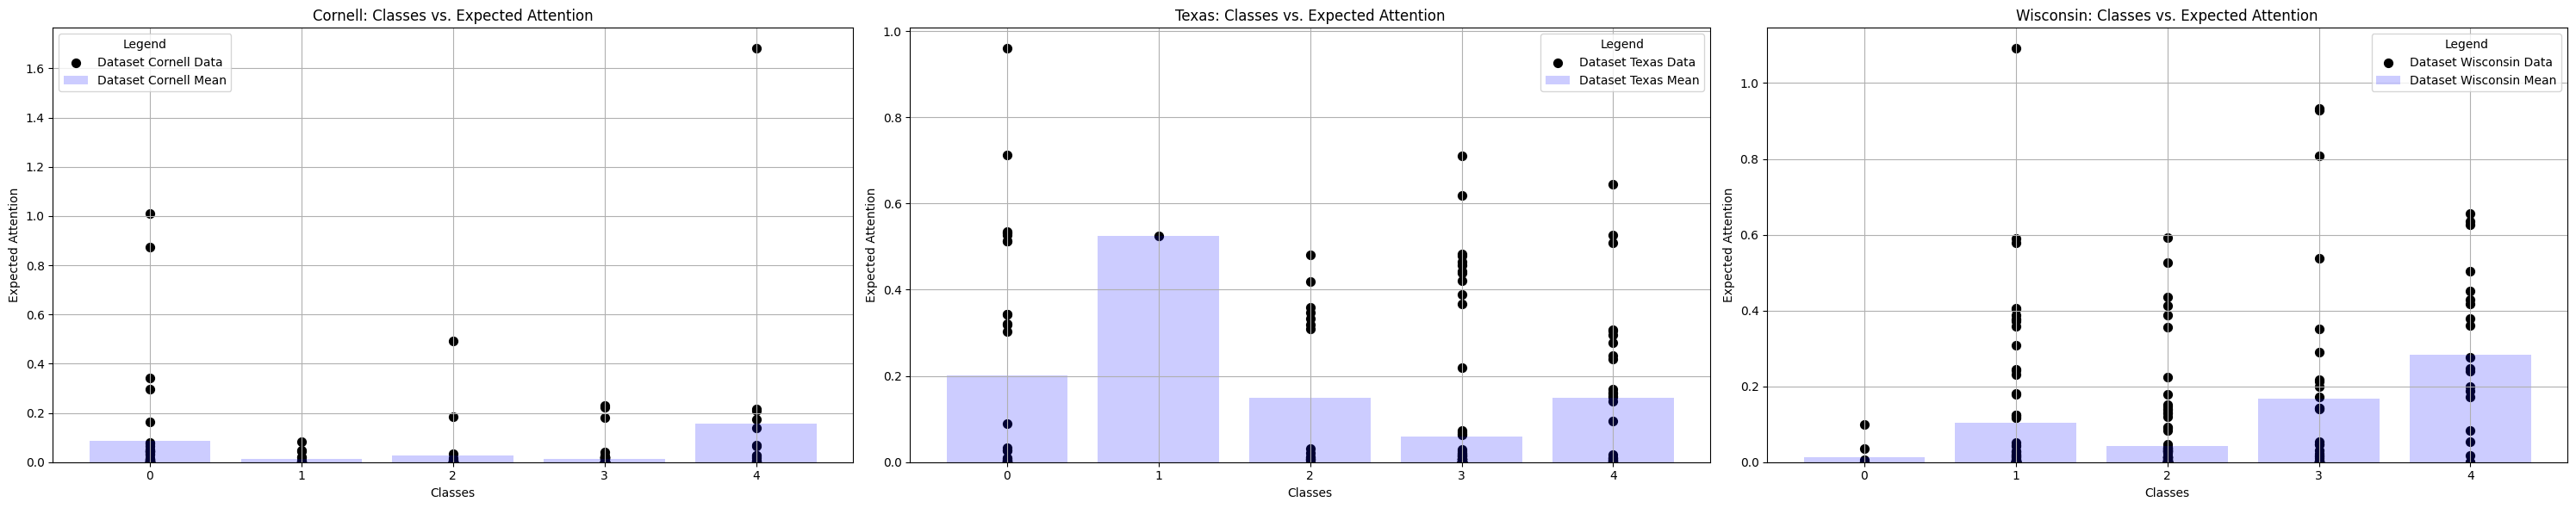

In [ ]:
### Figure 3 ###

from matplotlib.ticker import MaxNLocator

DATASETS1 = {key:DATASETS[key] for key in list(DATASETS.keys())[:4]}
DATASETS2 = {key:DATASETS[key] for key in list(DATASETS.keys())[4:]}

DATASET_CURR = DATASETS2

model_specs = [A1L_1H, A1L_2H, A2L_1H, A2L_2H ]

model_key = 'dt2_avg'
n_datasets = len(DATASET_CURR)

for all_attns in model_specs:
  fig, axes = plt.subplots(1, n_datasets, figsize=(10 * n_datasets, 6))  # Adjust the figure size as needed
  for idx, (data_key, ax) in enumerate(zip(DATASET_CURR, axes.flatten())):
    sp_curr = DATASETS[data_key].dense_sp_matrix.cuda()
    sp_curr = torch.nan_to_num(sp_curr, posinf=0)
    attention_curr = all_attns[data_key][model_key].cpu()
    expected_attention = np.array([(attention_curr[i] * sp_curr[i].cpu()).sum().cpu().item() for i in range(attention_curr.shape[0])])
    classes = DATASETS[data_key].y.cpu().numpy()

    # Calculate the mean expected attention for each class
    unique_classes = np.unique(classes)
    mean_attentions = [np.mean(expected_attention[classes == cls]) for cls in unique_classes]

    # Scatter plot for individual data points
    ax.scatter(classes, expected_attention, color='black', s=50, label=f'Dataset {data_key} Data')

    # Bar chart for mean expected attention
    ax.bar(unique_classes, mean_attentions, color='blue', alpha=0.2, label=f'Dataset {data_key} Mean')

    ax.set_title(f'{data_key}: Classes vs. Expected Attention')
    ax.set_xlabel('Classes')
    ax.set_ylabel('Expected Attention')
    ax.grid(True)
    ax.legend(title='Legend')

    # Ensure that only integer values are shown on the x-axis
  ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  plt.tight_layout()
  plt.show()

## Question 3: Do the heads learn the same patterns?

### Figure 4: Head N-Hop Neighborhood

torch.Size([183, 183]) torch.Size([183, 183])
torch.Size([183, 183]) torch.Size([183, 183])
torch.Size([183, 183]) torch.Size([183, 183])
torch.Size([183, 183]) torch.Size([183, 183])
torch.Size([251, 251]) torch.Size([251, 251])
torch.Size([251, 251]) torch.Size([251, 251])


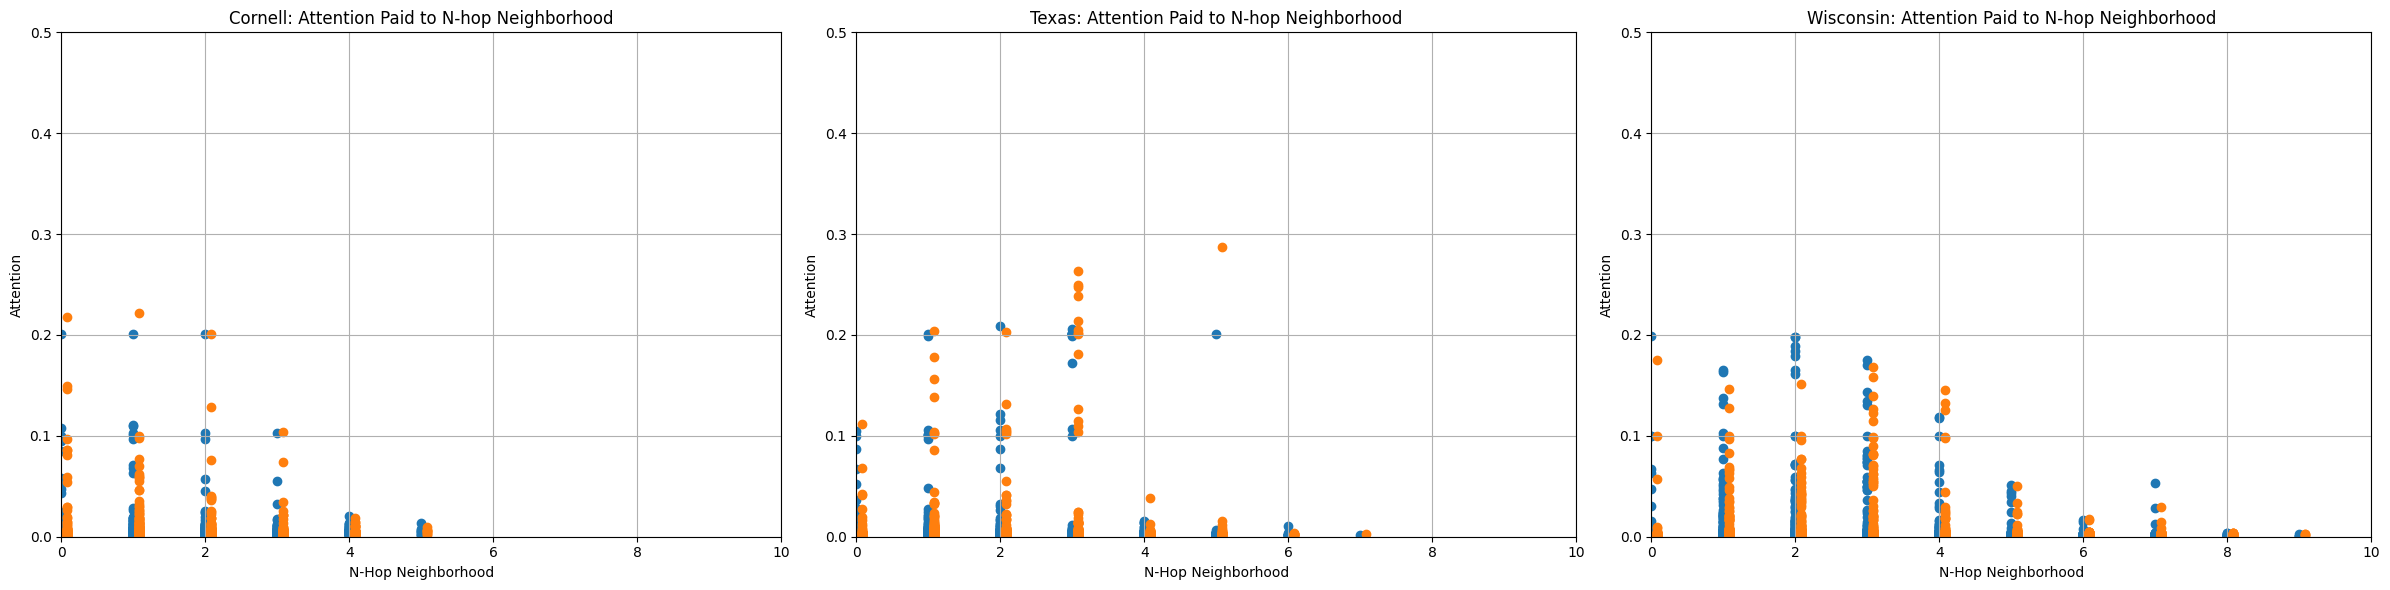

In [ ]:
### Figure 2 ###

import matplotlib.pyplot as plt
import numpy as np

num_heads = 2

# data_key = 'Cora'
metric = 'dt2_avg'

# Figure 2 subplots
DATASETS1 = {key:DATASETS[key] for key in list(DATASETS.keys())[:4]}
DATASETS2 = {key:DATASETS[key] for key in list(DATASETS.keys())[4:]}

DATASET_CURR = DATASETS2

all_attns = all_attns_2L_2H
x_min, x_max = 0, 10
y_min, y_max = 0, 0.5

fig, axes = plt.subplots(1, len(DATASET_CURR), figsize=(24, 6))
for ax, (data_key, data_value) in zip(axes, DATASET_CURR.items()):
    attn = all_attns[data_key][metric][0]
    sp = data_value["dense_sp_matrix"]
    for head_idx in range(num_heads):
      attn = all_attns[data_key][metric][0][head_idx]
      print(sp.cpu().shape,  attn.cpu().shape)
      ax.scatter(sp.cpu()+0.08*head_idx, attn.cpu())
    # ax.scatter(sp.cpu(), attn.cpu(), marker='x', color='blue')#,c=attn.cpu(), cmap='icefire')
    ax.set_title(f'{data_key}: Attention Paid to N-hop Neighborhood')
    ax.set_xlabel('N-Hop Neighborhood')
    ax.set_ylabel('Attention')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.grid(True)

plt.tight_layout()
plt.show()

### Figure 5: Comparison of Head Attention Patterns

In [ ]:


A_tilde = DATASETS['Cora'].dense_adj #+ torch.eye(DATASETS['Cora'].dense_adj.shape[0]).cuda()
D_tilde = torch.eye(A_tilde.shape[0]).cuda() * ((A_tilde.sum(axis=1)) ** -0.5)
GCN_Conv = (D_tilde @ A_tilde @ D_tilde).cpu()


In [ ]:
plt.scatter(A2L_1H, A2L_2H)

In [ ]:
# Are the two layers learning the same thing?
plt.scatter(all_attns_2L_1H['Cora']['dt2_avg'].mean(axis=1)[0].cpu(), all_attns_2L_1H['Cora']['dt2_avg'].mean(axis=1)[1].cpu())

In [ ]:
# Are the two heads learning the same thing?
plt.scatter(all_attns_1L_2H['Cora']['st_avg'][0][0], all_attns_1L_2H['Cora']['st_avg'][0][1])

## Question 4: Do the layers learn the same pattern?

## Question 5: Do the Models learn the same pattern?